# Introduction to Data Science - 22KDL
## Lab02 - Regression
### 22280012 - Nguyen Xuan Viet Duc

### Import the dataset:
The dataset has been downloaded from [https://archive.ics.uci.edu/dataset/477/real+estate+valuation+data+set](URL) and then converted from .xlsx to .csv format.

In [262]:
import pandas as pd
import numpy as np
#Read dataset from CSV file
df = pd.read_csv('Real_estate_valuation_data_set.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


The dataset consists of 6 feature variables: ***X1 transaction date***, ***X2 house age***, ***X3 distance to the nearest MRT station***, ***X4 number of convenience stores***, ***X5 latitude*** and ***X6 longitude*** and 1 target variable ***Y house price of unit area***.

### Data Exploration:

In [263]:
#Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


Above is the table of column information, including name, data type, and whether the column contains null values or not.

In [264]:
#Display descriptive statistics of the DataFrame
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


Explore the data by calculating some basic statistics such as count, mean, min, and max of each attribute in the dataset.

In [265]:
#Check if DataFrame contains null values
if df.isnull().values.any():
    print("Data contains missing values.")
    #Print rows with missing values
    rows_with_null = df[null_values]
    print("There are missing values in the following rows:")
    print(rows_with_null)
else:
    print("The data does not contain any missing values.")

The data does not contain any missing values.


### Preprocessing:


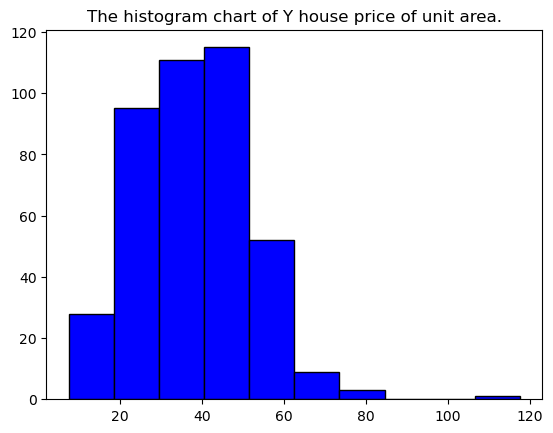

In [266]:
import matplotlib.pyplot as plt

data = df['Y house price of unit area']
# Draw a histogram chart of the Y house price of unit area.
plt.hist(data, bins=10, color='blue', edgecolor='black')
plt.title('The histogram chart of Y house price of unit area.')
plt.show()

In [267]:
def remove_outliers_iqr(df, column_name):
    
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df_filtered = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    
    return df_filtered

In [268]:
df = remove_outliers_iqr(df, 'Y house price of unit area')
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [269]:
def min_max_scaling(df, columns):
    for column in columns:
        min_val = df[column].min()
        max_val = df[column].max()
        df[column] = (df[column] - min_val) / (max_val - min_val)
    return df

columns_to_scale = ['X3 distance to the nearest MRT station', 'X2 house age', 'X4 number of convenience stores']
df_scaled = min_max_scaling(df.copy(), columns_to_scale)

Use the min-max scaling technique to preprocess the data, making it scaled within a small range for easier visualization and understanding.

In [270]:
df_scaled.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,0.730594,0.009513,1.0,24.98298,121.54024,37.9
1,2,2012.917,0.445205,0.043809,0.9,24.98034,121.53951,42.2
2,3,2013.583,0.303653,0.083315,0.5,24.98746,121.54391,47.3
3,4,2013.500,0.303653,0.083315,0.5,24.98746,121.54391,54.8
4,5,2012.833,0.114155,0.056799,0.5,24.97937,121.54245,43.1


Convert the data type of the transaction date column to datetime.

In [271]:
# retrieve the column "X1 transaction date" 
data = df_scaled['X1 transaction date']
df1 = pd.DataFrame(data)

# Split into year and day of the year
df1['Year'] = df1['X1 transaction date'].astype(int)
df1['DayOfYear'] = ((df1['X1 transaction date'] - df1['Year']) * 365).astype(int)

# Convert the number of days in the year to the corresponding day and month
df1['Date'] = pd.to_datetime(df1['Year'].astype(str), format='%Y') + pd.to_timedelta(df1['DayOfYear'], unit='D')

df_scaled['X1 transaction date'] = df1['Date']
df_scaled.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012-11-30,0.730594,0.009513,1.0,24.98298,121.54024,37.9
1,2,2012-11-30,0.445205,0.043809,0.9,24.98034,121.53951,42.2
2,3,2013-08-01,0.303653,0.083315,0.5,24.98746,121.54391,47.3
3,4,2013-07-02,0.303653,0.083315,0.5,24.98746,121.54391,54.8
4,5,2012-10-31,0.114155,0.056799,0.5,24.97937,121.54245,43.1


We can combine the latitude and longitude columns into one because if they stand alone, they don't make much sense. Below is the function to combine longitude and latitude into a single value. 
The function is taken from the soure [ https://datascience.stackexchange.com/questions/49553/combining-latitude-longitude-position-into-single-featur](URL)
e

In [272]:
from math import radians, cos, sin, asin, sqrt

def single_pt_haversine(lat, lng, degrees=True):
    r = 6371 # Earth's radius (km).

    # Convert decimal degrees to radians
    if degrees:
        lat, lng = map(radians, [lat, lng])

    # 'Single-point' Haversine formula
    a = sin(lat/2)**2 + cos(lat) * sin(lng/2)**2
    d = 2 * r * asin(sqrt(a)) 

    return d

Create a new column, X5 location, to store the combined value of longitude and latitude.

In [273]:
for index, row in df.iterrows():
    df_scaled.at[index, 'X5 location'] = single_pt_haversine(row['X5 latitude'], row['X6 longitude'])

df_scaled.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,X5 location
0,1,2012-11-30,0.730594,0.009513,1.0,24.98298,121.54024,37.9,13154.826996
1,2,2012-11-30,0.445205,0.043809,0.9,24.98034,121.53951,42.2,13154.829429
2,3,2013-08-01,0.303653,0.083315,0.5,24.98746,121.54391,47.3,13155.060033
3,4,2013-07-02,0.303653,0.083315,0.5,24.98746,121.54391,54.8,13155.060033
4,5,2012-10-31,0.114155,0.056799,0.5,24.97937,121.54245,43.1,13155.143344


Finally, we need to delete the two columns of longitude and latitude.

In [274]:
df_scaled = df_scaled.drop(columns = ['X5 latitude', 'X6 longitude'] )
df_scaled.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area,X5 location
0,1,2012-11-30,0.730594,0.009513,1.0,37.9,13154.826996
1,2,2012-11-30,0.445205,0.043809,0.9,42.2,13154.829429
2,3,2013-08-01,0.303653,0.083315,0.5,47.3,13155.060033
3,4,2013-07-02,0.303653,0.083315,0.5,54.8,13155.060033
4,5,2012-10-31,0.114155,0.056799,0.5,43.1,13155.143344


Return the position of the columns according to ascending feature order, with the target variable at the end (for aesthetic purposes).

In [275]:
# List of columns in the new order
new_column_order = ['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 location', 'Y house price of unit area']

# Reorder the columns in the DataFrame
df_scaled = df_scaled.reindex(columns=new_column_order)

df_scaled.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 location,Y house price of unit area
0,2012-11-30,0.730594,0.009513,1.0,13154.826996,37.9
1,2012-11-30,0.445205,0.043809,0.9,13154.829429,42.2
2,2013-08-01,0.303653,0.083315,0.5,13155.060033,47.3
3,2013-07-02,0.303653,0.083315,0.5,13155.060033,54.8
4,2012-10-31,0.114155,0.056799,0.5,13155.143344,43.1


Continue using min-max scaling for the X5 location column to synchronize the data of the feature variable.

In [276]:
columns_to_scale1 = ['X5 location']
df_scaled = min_max_scaling(df_scaled.copy(), columns_to_scale1)
df_scaled.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 location,Y house price of unit area
0,2012-11-30,0.730594,0.009513,1.0,0.634810,37.9
1,2012-11-30,0.445205,0.043809,0.9,0.635077,42.2
2,2013-08-01,0.303653,0.083315,0.5,0.660353,47.3
3,2013-07-02,0.303653,0.083315,0.5,0.660353,54.8
4,2012-10-31,0.114155,0.056799,0.5,0.669484,43.1


Split the dataset into feature variables X.

In [277]:
X = df_scaled.iloc[:, :-1]  
X.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 location
0,2012-11-30,0.730594,0.009513,1.0,0.634810
1,2012-11-30,0.445205,0.043809,0.9,0.635077
2,2013-08-01,0.303653,0.083315,0.5,0.660353
3,2013-07-02,0.303653,0.083315,0.5,0.660353
4,2012-10-31,0.114155,0.056799,0.5,0.669484


Split the dataset to extract the target variable Y.

In [278]:
y = df_scaled.iloc[:, -1]
y.head()

0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: Y house price of unit area, dtype: float64

### Feature Selection/Engineering:

Combine the two datasets X and Y and add back the X1 transaction date column to create a correlation matrix between the feature variables and between each feature variable and the target variable.

In [279]:
Z = X.join(y)
Z['X1 transaction date'] = df_scaled['X1 transaction date']

# List of columns in the new order
new_column_order = ['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 location', 'Y house price of unit area']

# Reorder the columns in the DataFrame
Z = Z.reindex(columns=new_column_order)
Z.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 location,Y house price of unit area
0,2012-11-30,0.730594,0.009513,1.0,0.634810,37.9
1,2012-11-30,0.445205,0.043809,0.9,0.635077,42.2
2,2013-08-01,0.303653,0.083315,0.5,0.660353,47.3
3,2013-07-02,0.303653,0.083315,0.5,0.660353,54.8
4,2012-10-31,0.114155,0.056799,0.5,0.669484,43.1


Initialize the correlation matrix and print it to the screen.

In [280]:
correlation_matrix = Z.corr()
correlation_matrix

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 location,Y house price of unit area
X1 transaction date,1.000000,0.010092,0.065624,0.002209,-0.055071,0.067027
X2 house age,0.010092,1.000000,0.030167,0.035385,-0.070640,-0.242852
X3 distance to the nearest MRT station,0.065624,0.030167,1.000000,-0.604710,-0.721812,-0.701349
X4 number of convenience stores,0.002209,0.035385,-0.604710,1.000000,0.371620,0.605853
X5 location,-0.055071,-0.070640,-0.721812,0.371620,1.000000,0.454871
Y house price of unit area,0.067027,-0.242852,-0.701349,0.605853,0.454871,1.000000


Draw a heatmap of the correlation matrix to visualize the relationships between them more clearly.

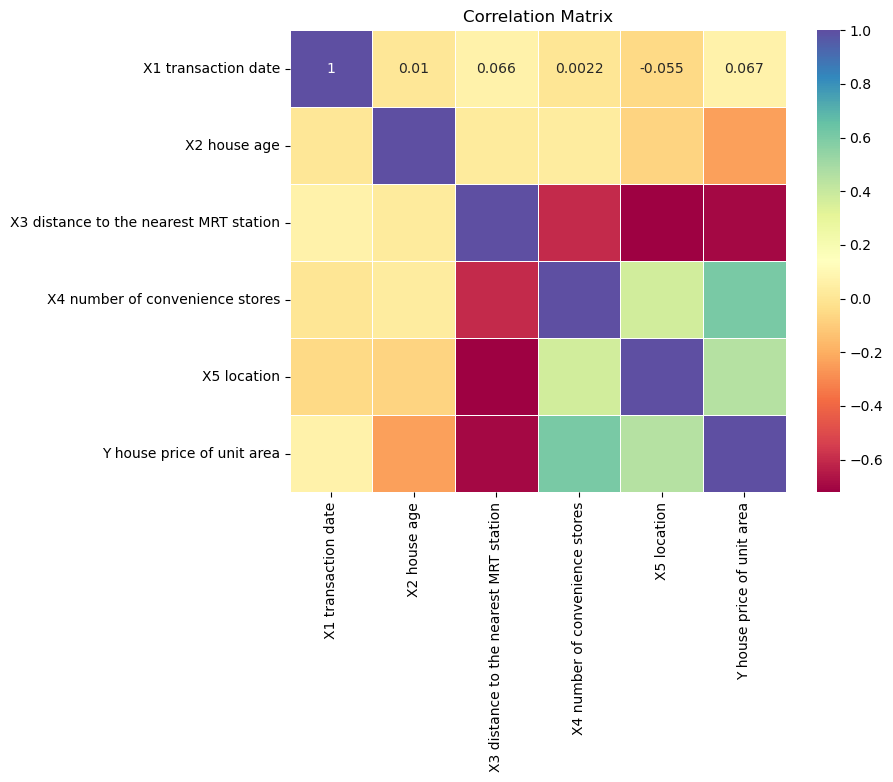

In [281]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, cmap = 'Spectral',annot=True,linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Model Training and Model Evaluation:

In [282]:
# mean 
def get_mean(arr):
    return np.sum(arr)/len(arr)

# variance
def get_variance(arr, mean):
    return np.sum((arr-mean)**2)

# covariance
def get_covariance(arr_x, mean_x, arr_y, mean_y):
    final_arr = (arr_x - mean_x)*(arr_y - mean_y)
    return np.sum(final_arr)

In [283]:
# Coefficients 
# m = cov(x, y) / var(x)
# b = y - m*x
def get_coefficients(x, y):
    x_mean = get_mean(x)
    y_mean = get_mean(y)
    m = get_covariance(x, x_mean, y, y_mean)/get_variance(x, x_mean)
    b = y_mean - x_mean*m
    return m, b

The functions get_mean, get_variance, get_covariance, and get_coefficients are created to use during the model training process and for making predictions.

In [284]:
# Linear Regression 
# Train and Test
def linear_regression(x_train, y_train, x_test, y_test):
    prediction = []
    m, b = get_coefficients(x_train, y_train)
    for x in x_test:
        y = m*x + b
        prediction.append(y)
    return prediction

Train the model and make predictions.

First, I perform linear regression with the feature variable ***X3 distance to the nearest MRT station*** and the target variable Y.

Get the values of the variable X3 and Y to prepare for model training.

In [130]:
X3 = df_scaled['X3 distance to the nearest MRT station'].values
y = df_scaled['Y house price of unit area'].values

print(X3.shape)
print(y.shape)

(411,)
(411,)


Use the scikit-learn library to split X3 and Y into training and testing sets.

In [131]:
import numpy as np
from sklearn.model_selection import train_test_split
X3_train, X3_test, y_train, y_test = train_test_split(X3, y, test_size=0.2)

Transform the data to fit the machine learning model: convert X3_train from a one-dimensional array to a two-dimensional array with one column and the number of rows determined automatically to fit the size of the original array.

In [133]:
X3_train = np.array(X3_train).reshape(-1, 1)
X3_test = np.array(X3_test).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

Perform linear regression model with X3 and make predictions for the test set.

In [134]:
predictionX3 = linear_regression(X3_train, y_train, X3_test, y_test)

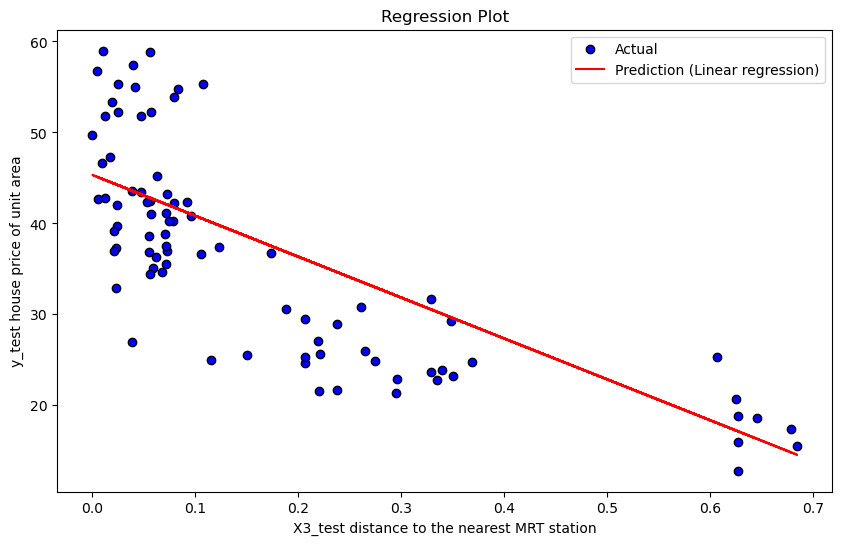

In [135]:
plt.figure(figsize=(10, 6))

# Plot a scatter plot with blue dots (actual).
plt.scatter(X3_test, y_test, color='blue', label='Actual', edgecolor='black')

# Plot a red line (prediction).
plt.plot(X3_test, predictionX3, color='red', label='Prediction (Linear regression)')

# Label the x-axis and y-axis.
plt.xlabel('X3_test distance to the nearest MRT station')
plt.ylabel('y_test house price of unit area')

# Set the title for the chart.
plt.title("Regression Plot")
plt.legend()
plt.show()


Looking at the chart, we can see the distribution of X3 points against house prices and the regression line. The regression line has a slope less than 0, indicating a decreasing trend. This suggests that as a house gets farther away from the nearest MRT station, its value tends to decrease. This observation aligns with common sense.

Calculate the metrics to evaluate the effectiveness of the model. Here, I have used the built-in functions from the sklearn library to calculate them.
- ***R-squared*** measures the proportion of the variance in the dependent variable that the model can explain compared to the total variance of the dependent variable.
- ***Mean Squared Error (MSE)*** measures the average of the squared differences between the predicted values of the model and the actual values of the data.
- ***Mean Absolute Error (MAE)*** measures the average of the absolute differences between the predicted values of the model and the actual values of the data.

In [136]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2 = r2_score(y_test, predictionX3)
mse = mean_squared_error(y_test, predictionX3)
mae = mean_absolute_error(y_test, predictionX3)
print("The R2 score of the model is: ", r2)
print("The MSE score of the model is: ", mse)
print("The MAE score of the model is: ", mae)

The R2 score of the model is:  0.5780905355378649
The MSE score of the model is:  58.880828670131876
The MAE score of the model is:  6.225961126303032



- ***R-squared (R2 score)***: The R2 value is 0.578, meaning that the model can explain about 57.8% of the variance in the data, indicating its ability to predict a large portion of the variability of the dependent variable. Although not a high R2 value, it shows that the model performs better than just using the mean value of the dependent variable.

- ***Mean Squared Error (MSE)***: The MSE value is about 58.8, indicating that the average squared difference between the model's predictions and the actual values is about 0.023.

- ***Mean Absolute Error (MAE)***: The MAE value is about 6.225, indicating that the average absolute difference between the model's predictions and the actual values is about 0.118.

I've done the same thing with ***X4 number of convenience stores*** and ***X5 location*** as I did with ***X3 distance to the nearest MRT station***, so I won't explain much about the code part. Please pay attention to the charts and model evaluation metrics

In [290]:
X4 = df_scaled['X4 number of convenience stores'].values
y = df_scaled['Y house price of unit area'].values

print(X4.shape)
print(y.shape)

(411,)
(411,)


In [295]:
import numpy as np
from sklearn.model_selection import train_test_split
X4_train, X4_test, y_train, y_test = train_test_split(X4, y, test_size=0.2)

X4_train = np.array(X4_train).reshape(-1, 1)
X4_test = np.array(X4_test).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

In [296]:
predictionX4 = linear_regression(X4_train, y_train, X4_test, y_test)

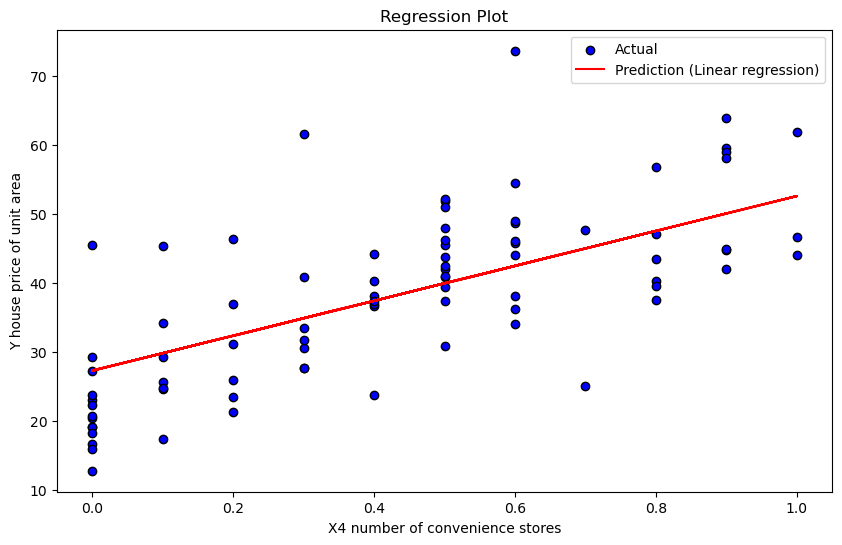

In [297]:

plt.figure(figsize=(10, 6))

plt.scatter(X4_test, y_test, color='blue', label='Actual', edgecolor='black')

plt.plot(X4_test, predictionX4, color='red', label='Prediction (Linear regression)')

plt.xlabel('X4 number of convenience stores')
plt.ylabel('Y house price of unit area')

plt.title("Regression Plot")
plt.legend()
plt.show()


From the chart above, we can see that if a house is surrounded by more convenience stores and amenities, its price tends to be higher compared to areas with fewer amenities.

In [298]:
r2 = r2_score(y_test, predictionX4)
mse = mean_squared_error(y_test, predictionX4)
mae = mean_absolute_error(y_test, predictionX4)
print("The R2 score of the model is: ", r2)
print("The MSE score of the model is: ", mse)
print("The MAE score of the model is: ", mae)

The R2 score of the model is:  0.5058900440360226
The MSE score of the model is:  80.62312609013767
The MAE score of the model is:  7.081864862123689


- ***R2 score:*** 0.506, indicating that the model can explain approximately 50.6% of the variance in the data. Although not high, it shows that the model performs better than just using the mean value of the dependent variable.

- ***Mean Squared Error (MSE):*** 80.6, indicating that the average squared difference between the model's predictions and the actual values is about 80.6. This value is low, meaning that the errors between the predictions and the actual values are small.

- ***Mean Absolute Error (MAE):*** 7, indicating that the average absolute difference between the model's predictions and the actual values is about 7. This value is also relatively low, indicating that the model makes accurate predictions.

For ***X5 location*** and the target variable Y:

In [299]:
X5 = df_scaled['X5 location'].values
y = df_scaled['Y house price of unit area'].values

print(X5.shape)
print(y.shape)

(411,)
(411,)


In [300]:
import numpy as np
from sklearn.model_selection import train_test_split
X5_train, X5_test, y_train, y_test = train_test_split(X5, y, test_size=0.2)

X5_train = np.array(X5_train).reshape(-1, 1)
X5_test = np.array(X5_test).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

In [301]:
predictionX5 = linear_regression(X5_train, y_train, X5_test, y_test)

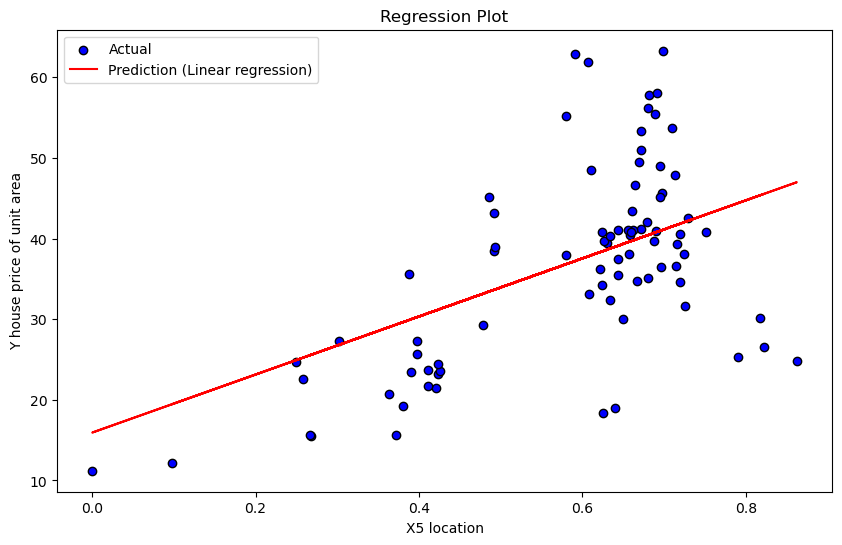

In [302]:
plt.figure(figsize=(10, 6))

plt.scatter(X5_test, y_test, color='blue', label='Actual', edgecolor='black')

plt.plot(X5_test, predictionX5, color='red', label='Prediction (Linear regression)')

plt.xlabel('X5 location')
plt.ylabel('Y house price of unit area')

plt.title("Regression Plot")
plt.legend()
plt.show()


Based on the graph, we can see that as the coordinate values increase, the house prices also tend to increase. This is understandable because when we look at the correlation matrix, we can see that X5 location has a negative correlation with the distance to the nearest MRT station and a positive correlation with the number of convenience stores. As this value increases, it implies that the distance to the nearest MRT station is shorter and the number of convenience stores is higher. Increasing location values may also indicate moving deeper into the city center.

In [303]:
r2 = r2_score(y_test, predictionX5)
mse = mean_squared_error(y_test, predictionX5)
mae = mean_absolute_error(y_test, predictionX5)
print("The R2 score of the model is: ", r2)
print("The MSE score of the model is: ", mse)
print("The MAE score of the model is: ", mae)

The R2 score of the model is:  0.34025991594666705
The MSE score of the model is:  98.59546546176176
The MAE score of the model is:  7.599725025667506


- ***R2 score:*** 0.34, indicating that the model can explain approximately 34% of the variance in the data. This means that the model cannot explain a large portion of the variance in the data and may predict worse than just using the mean value of the dependent variable.

- ***Mean Squared Error (MSE):*** 98.5, indicating that the average squared difference between the model's predictions and the actual values is about 98.5. This value is not too high but also not too low, suggesting that the model may struggle to accurately predict the data.

- ***Mean Absolute Error (MAE):*** 7.59, indicating that the average absolute difference between the model's predictions and the actual values is about 7.59. This value is also not too high but not too low, suggesting that the model may have difficulty predicting some specific samples.

In [307]:
X2345 = Z.drop(columns = ['X1 transaction date', 'Y house price of unit area'])
y = Z['Y house price of unit area']

print(X2345.shape)
print(y.shape)

(411, 4)
(411,)


In [308]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

X2345_train, X2345_test, y_train, y_test = train_test_split(X2345,y,test_size=0.2,random_state=42)

In [309]:
linear = LinearRegression()
linear.fit(X2345_train,y_train)
pred_test = linear.predict(X2345_test)

In [310]:
mse = mean_squared_error(y_test, pred_test)
r2 = r2_score(y_test, pred_test)
print('Mean square error is ',mse)
print('R2 score is ',r2)

Mean square error is  81.69046031144694
R2 score is  0.41187594467136646


- The mean squared error value of 81.69 is generally not too high.
- The R2 score of 0.4118 indicates that the model can only explain about 41.18% of the variance in the dependent variable, while the rest is the variance not explained by the model.

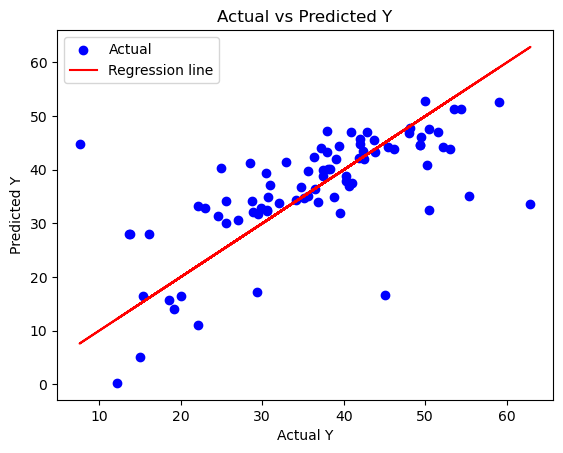

In [311]:
plt.scatter(y_test, pred_test, color='blue', label='Actual')

plt.plot(y_test, y_test, color='red', label='Regression line')

plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')
plt.title('Actual vs Predicted Y')
plt.legend()

plt.show()

In general, the predictions are quite good as many points are very close to the actual values. However, there are some points that are significantly different from the actual values.

In [312]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X2345_train,y_train)

pred_test_lasso = lasso.predict(X2345_test)
r2 = r2_score(y_test, pred_test_lasso)

print('R2 score is ',r2)

R2 score is  0.3332936886335287


It gives a lower R2 score compared to linear regression.

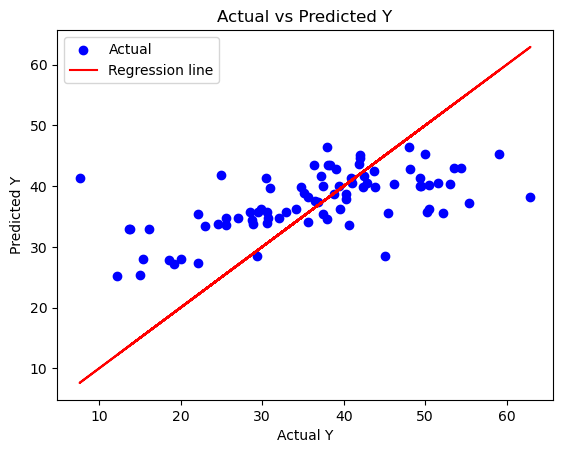

In [313]:

plt.scatter(y_test, pred_test_lasso, color='blue', label='Actual')
plt.plot(y_test, y_test,color = 'red',label= 'Regression line')

plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')
plt.title('Actual vs Predicted Y')

plt.legend()
plt.show()

### Hyperparameter Tuning

In [314]:
#Retrieve the parameters of the Lasso regression performed.
lasso.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}


I decide to try improving the above Lasso model by adjusting some of its parameters.

In [315]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
#The parameters I want to tune are as follows:
params = {
    'alpha': [0.001, 0.01 , 1.0, 10, 100],
    'random_state' :[0, 11, 23, 42, 61],
    'max_iter':[20, 50, 60, 100, 500, 1000]
}
grid = GridSearchCV(estimator=lasso,param_grid=params,cv = 5)
grid.fit(X2345_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 1.0, 10, 100],
                         'max_iter': [20, 50, 60, 100, 500, 1000],
                         'random_state': [0, 11, 23, 42, 61]})

In [316]:
hyp_lasso_pred = grid.predict(X2345_test)

hyp_lasso_r2_score = r2_score(y_test, hyp_lasso_pred)
print("R2 score is ",hyp_lasso_r2_score)

R2 score is  0.4120575891198204



I receive a significantly higher R2 score compared to before after tuning the parameters.

In [317]:
#The best_params_ method provides the best parameters of the model.
grid.best_params_ 

{'alpha': 0.001, 'max_iter': 20, 'random_state': 0}

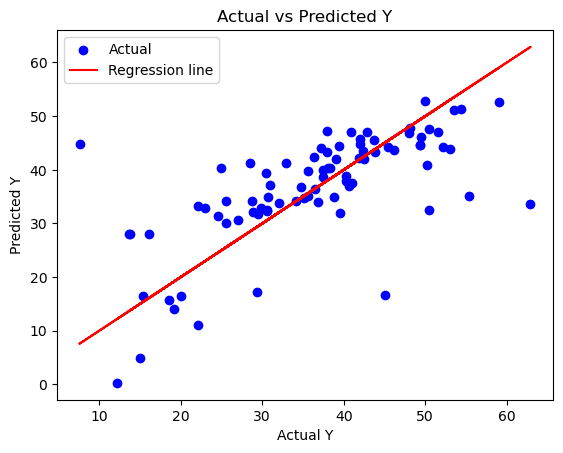

In [321]:
plt.scatter(y_test, hyp_lasso_pred, color='blue', label='Actual')
plt.plot(y_test, y_test,color = 'red',label= 'Regression line')

plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')
plt.title('Actual vs Predicted Y')

plt.legend()
plt.show()

The predicted and actual values plot after tuning seems to be better than before
To facilitate visualization, let's display the two charts in the same cell below.

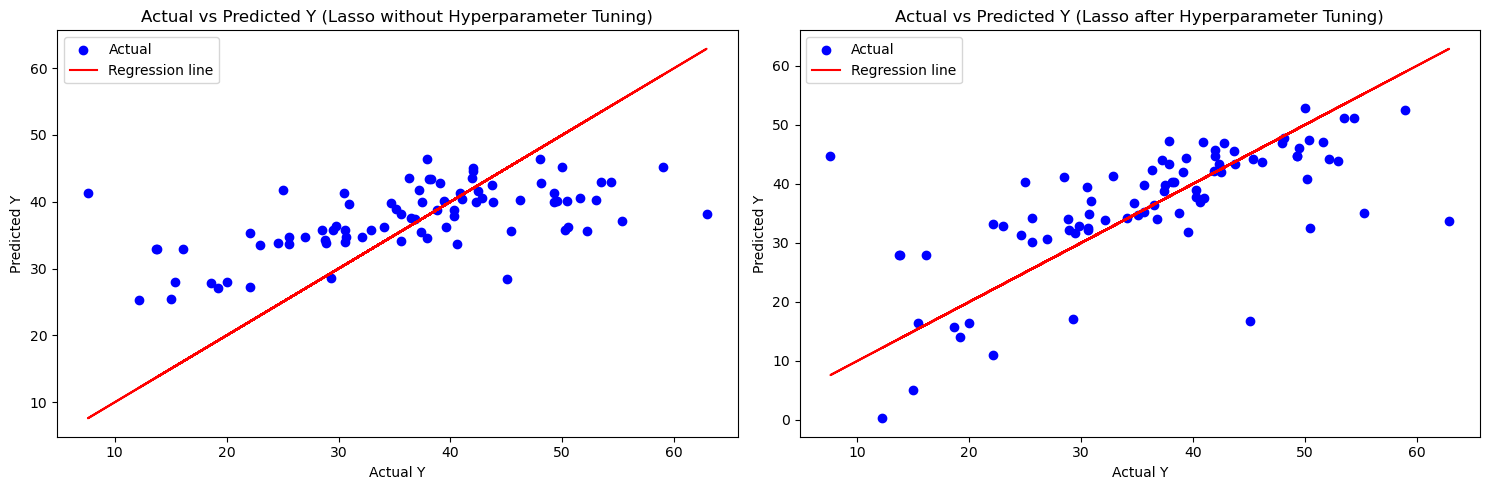

In [323]:
# Create a display framework with two cells.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Chart 1: Scatter plot and the best-fit line for the Lasso model
ax1.scatter(y_test, pred_test_lasso, color='blue', label='Actual')
ax1.plot(y_test, y_test, color='red', label='Regression line')
ax1.set_xlabel('Actual Y')
ax1.set_ylabel('Predicted Y')
ax1.set_title('Actual vs Predicted Y (Lasso without Hyperparameter Tuning)')
ax1.legend()

# Chart 2: Scatter plot and the best-fit line for the Linear Regression model
ax2.scatter(y_test, hyp_lasso_pred, color='blue', label='Actual')
ax2.plot(y_test, y_test, color='red', label='Regression line')
ax2.set_xlabel('Actual Y')
ax2.set_ylabel('Predicted Y')
ax2.set_title('Actual vs Predicted Y (Lasso after Hyperparameter Tuning)')
ax2.legend()

plt.tight_layout()
plt.show()

### Summary:

My models for predicting house prices are for reference only. The price of a house can depend on many factors simultaneously, as we have seen that house prices are significantly influenced by the amenities and services surrounding them
- .